## Project Title - Predicting House Prices

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading Data
df = pd.read_csv('House Price India.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [4]:
df.shape

(14620, 23)

In [5]:
df_columns = df.columns
df_columns 

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [7]:
# Convert 'number of bathrooms' and 'number of floors' to integer type
df['number of bathrooms'] = df['number of bathrooms'].astype(int)
df['number of floors'] = df['number of floors'].astype(int)

In [8]:
# checking Null values
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [9]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,1.761286,2098.262996,1.509328e+04,1.453352,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.736921,928.275721,3.791962e+04,0.552787,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.000000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.000000,1930.000000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.000000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [10]:
# checking duplicate rows
df.duplicated().sum()

0

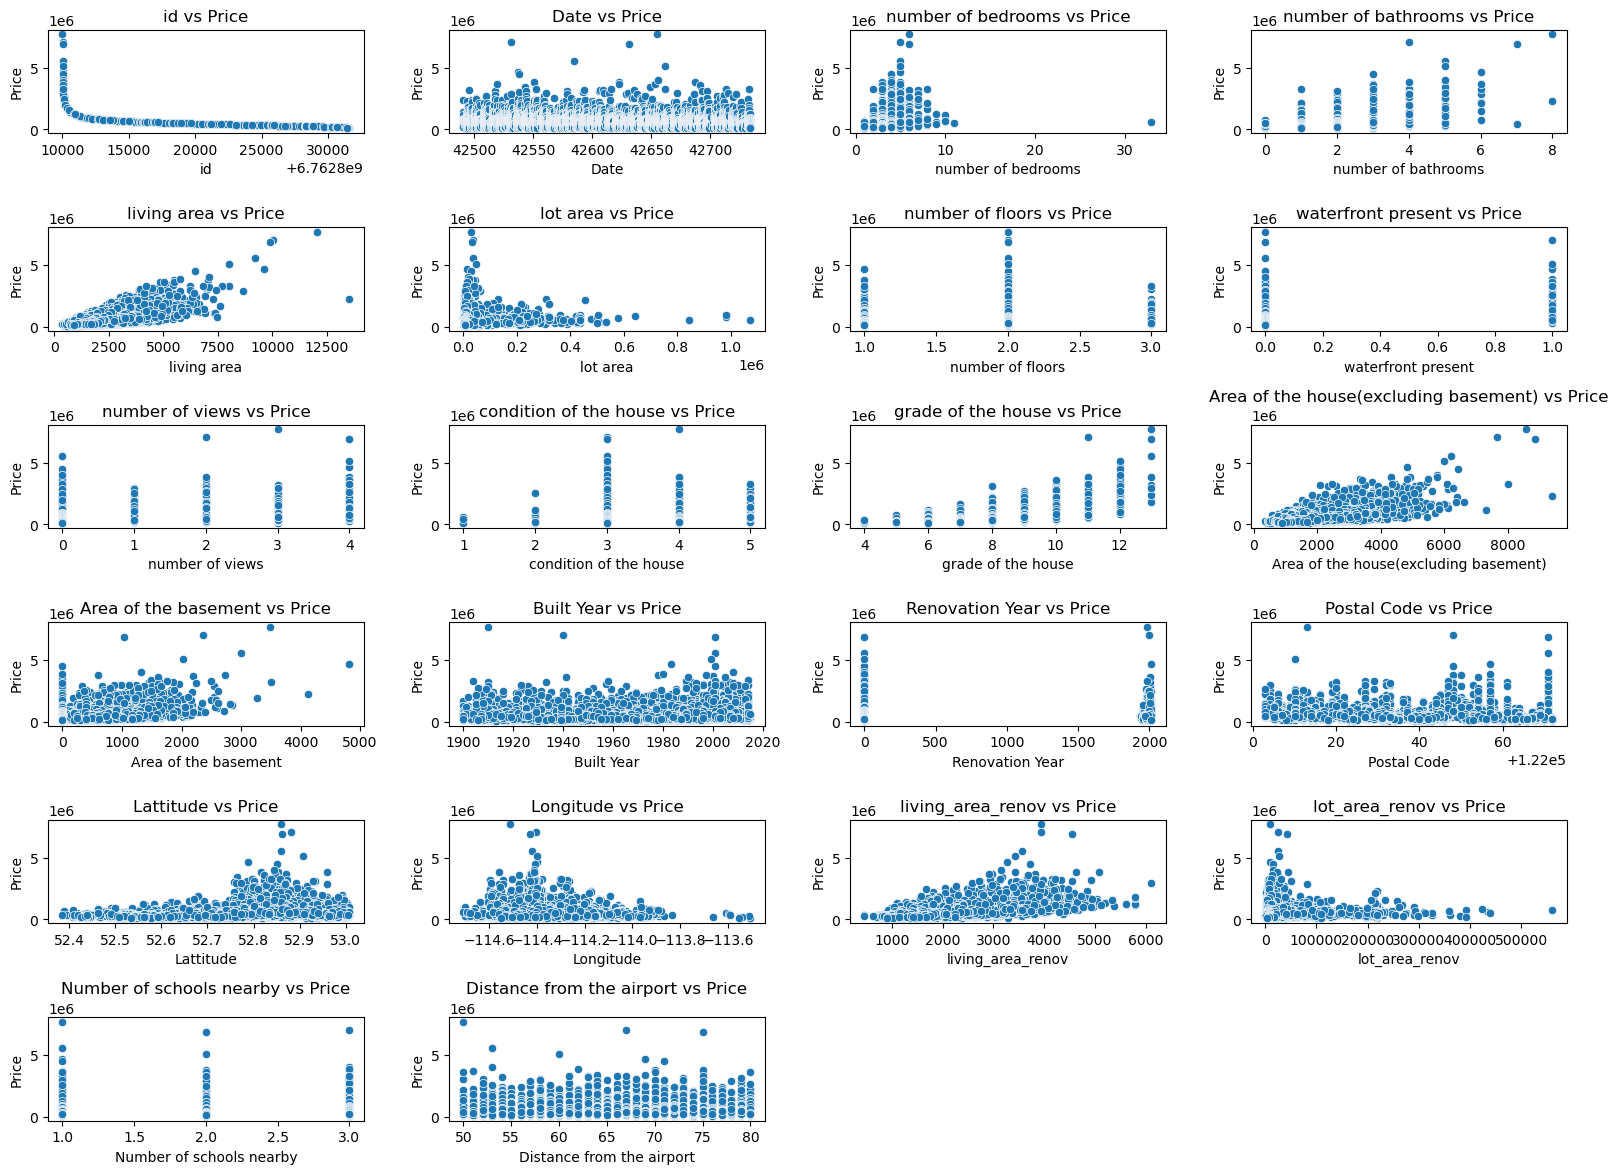

In [11]:
independent_variables = df.drop(columns=['Price']).columns
dependent_variable = 'Price'

# Determine the number of subplots needed based on the number of independent variables
num_features = len(independent_variables)
num_rows = num_features // 4 + (1 if num_features % 4 != 0 else 0)

plt.figure(figsize=(16, 12))
for i, feature in enumerate(independent_variables, 1):
    plt.subplot(num_rows, 4, i)
    sns.scatterplot(x=df[feature], y=df[dependent_variable])
    plt.title(f'{feature} vs {dependent_variable}')
    plt.xlabel(feature)
    plt.ylabel(dependent_variable)
plt.tight_layout()
plt.show()

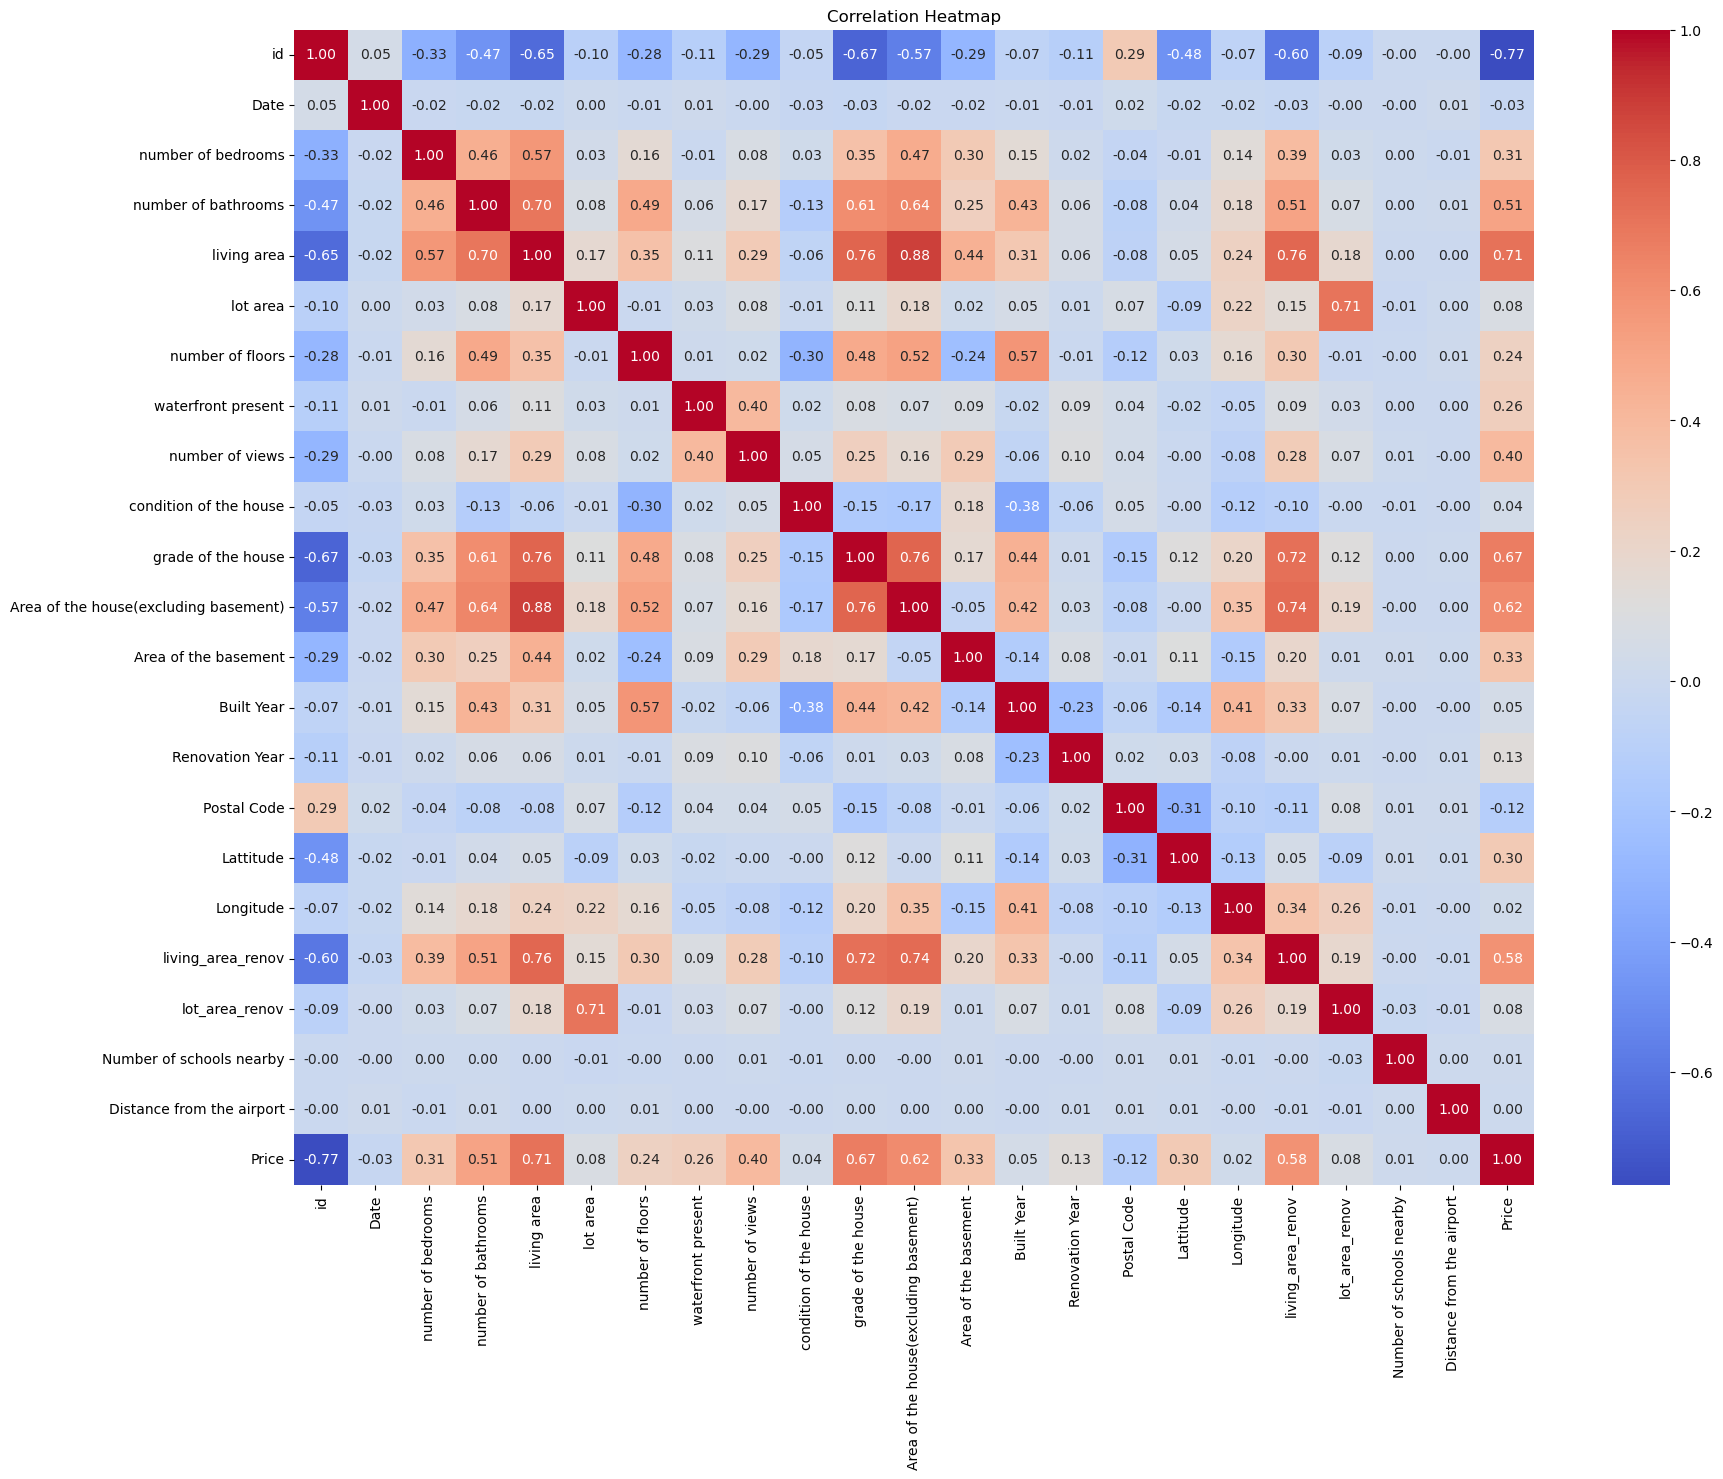

In [12]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**The analysis reveals positive correlations between various housing features such as number of bedrooms, bathrooms, living area, and lot area with house prices. Additionally, weaker negative correlations are observed for the built year and distance to the airport, suggesting newer houses and those farther from airports tend to command higher prices.**

In [13]:
# Remove unnecessary columns
features_to_remove = ['id','Date','Postal Code']
df.drop(columns= features_to_remove, inplace=True)

In [14]:
# We perform PCA to reduce the dimensionality of the dataset
X = df.drop(columns =['Price'])

# standardize The Features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# perform PCA
pca = PCA()
X_pca =pca.fit_transform(X_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
df_explained_variance = pd.DataFrame({'feature': X.columns, 'Explained Variance': explained_variance_ratio})
df_explained_variance = df_explained_variance.sort_values(by='Explained Variance', ascending=False)
print("Explained variance ratio:\n", df_explained_variance)

Explained variance ratio:
                                   feature  Explained Variance
0                      number of bedrooms        2.654196e-01
1                     number of bathrooms        1.116282e-01
2                             living area        9.467995e-02
3                                lot area        6.798843e-02
4                        number of floors        5.726521e-02
5                      waterfront present        5.283359e-02
6                         number of views        5.246088e-02
7                  condition of the house        5.124812e-02
8                      grade of the house        4.346656e-02
9   Area of the house(excluding basement)        3.991899e-02
10                   Area of the basement        3.455071e-02
11                             Built Year        3.139680e-02
12                        Renovation Year        2.580427e-02
13                              Lattitude        1.811125e-02
14                              Longitude  

In [15]:
# Remove less important features based on explained variance ratio
features_to_remove1 = ['living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport','Renovation Year','Built Year']

df.drop(columns= features_to_remove1, inplace=True)

In [16]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Lattitude,Longitude,Price
0,5,2,3650,9050,2,0,4,5,10,3370,280,52.8645,-114.557,2380000
1,4,2,2920,4000,1,0,0,5,8,1910,1010,52.8878,-114.470,1400000
2,5,2,2910,9480,1,0,0,3,8,2910,0,52.8852,-114.468,1200000
3,4,2,3310,42998,2,0,0,3,9,3310,0,52.9532,-114.321,838000
4,3,2,2710,4500,1,0,0,4,8,1880,830,52.9047,-114.485,805000


In [17]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price']), df['Price'], test_size=0.2, random_state=42)

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_scaled = linear_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_scaled)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

print("Linear Regression Model")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Linear Regression Model
Mean Squared Error (MSE): 41973579491.51106
Mean Absolute Error (MAE): 130182.0846191542
R-squared (R2): 0.7021438252768082


In [20]:
# Intialize Random Forest Regressort
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate R-squared (R2)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2):", r2_rf)


Random Forest Regression Model:
Mean Squared Error (MSE): 17051435621.201832
Mean Absolute Error (MAE): 68434.41900177512
R-squared (R2): 0.8789982782217294
